In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
# peeking at the dataset
df = pd.read_csv("mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
# finding the shape
df.shape

(1453, 15)

In [4]:
import pandas as pd

# Select columns 1 to 11 and convert them to a matrix
MD_x = df.iloc[:, 0:11].values

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate and round the column means
col_means = pd.DataFrame(MD_x).mean().round(2)

print(col_means)


0     0.55
1     0.91
2     0.09
3     0.87
4     0.53
5     0.90
6     0.60
7     0.64
8     0.36
9     0.20
10    0.24
dtype: float64


In [5]:
# getting the value counts of 'VisitFrequency'
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [6]:
# getting the value counts of 'Gender'
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

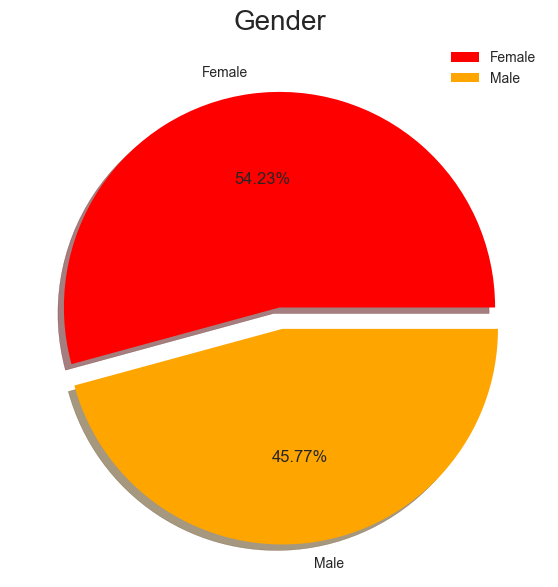

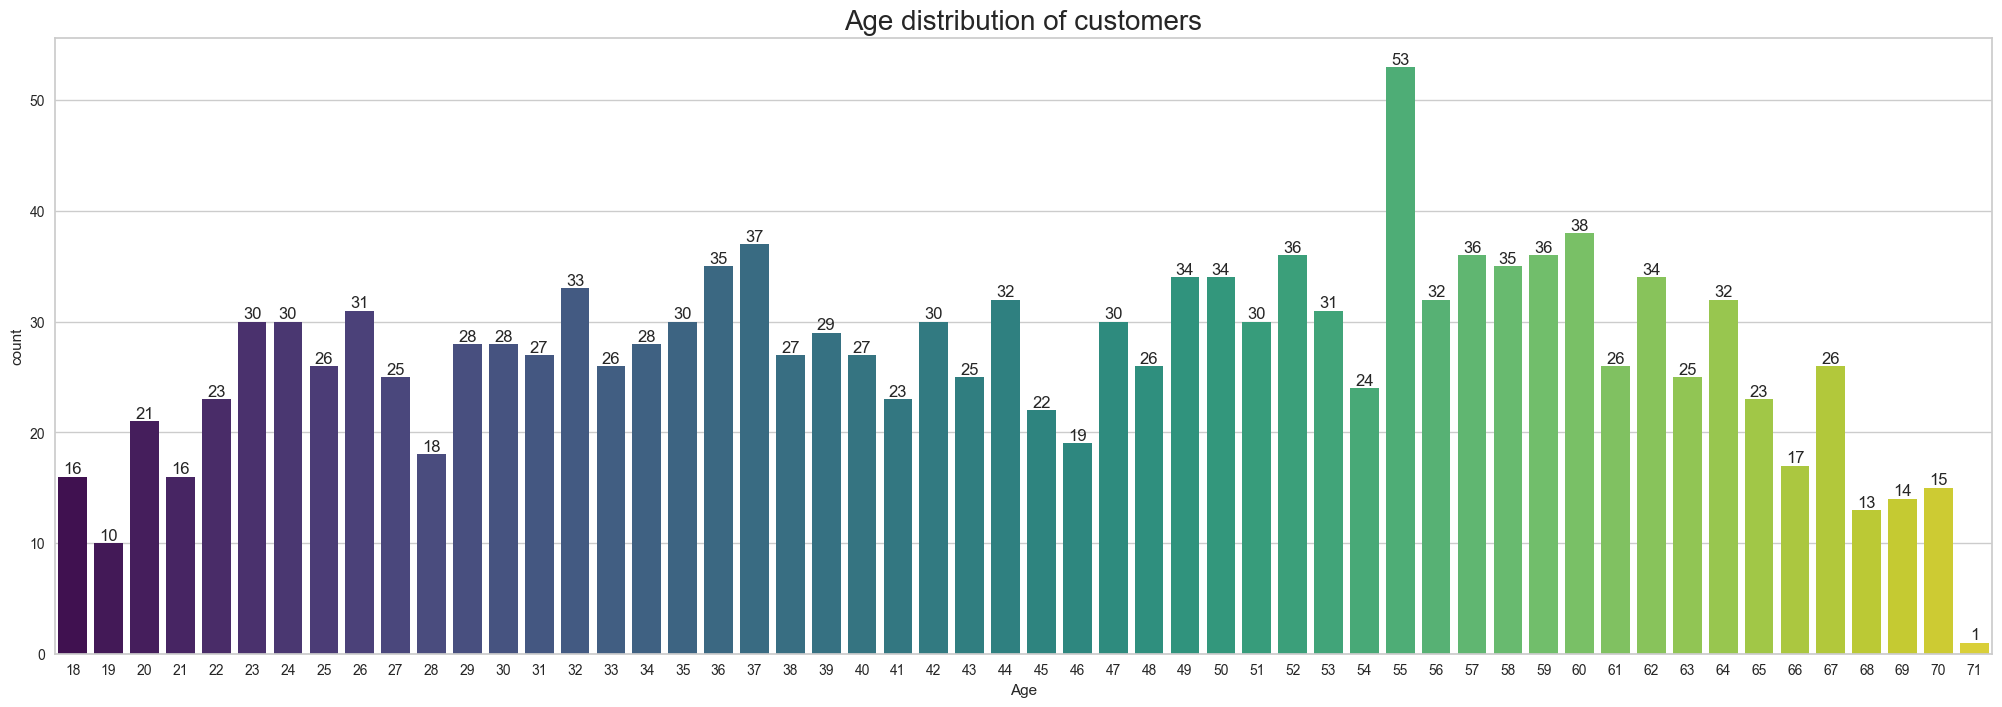

In [7]:
# Demographic segmentation using 'Age' & 'Gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'orange']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Age'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

# Data Preprocessing

In [8]:
# columns other than Like, Age, VisitFrequency, Gender are having binary features in the form of Yes/No only.
# so we will perform 'label encoding' for further model building
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 

In [9]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [10]:
# LabelEncoder will map 'Yes' to 1 and 'No' to 0
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


# Applying PCA

In [11]:
# applying scaling and PCA
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [12]:
# variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [13]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


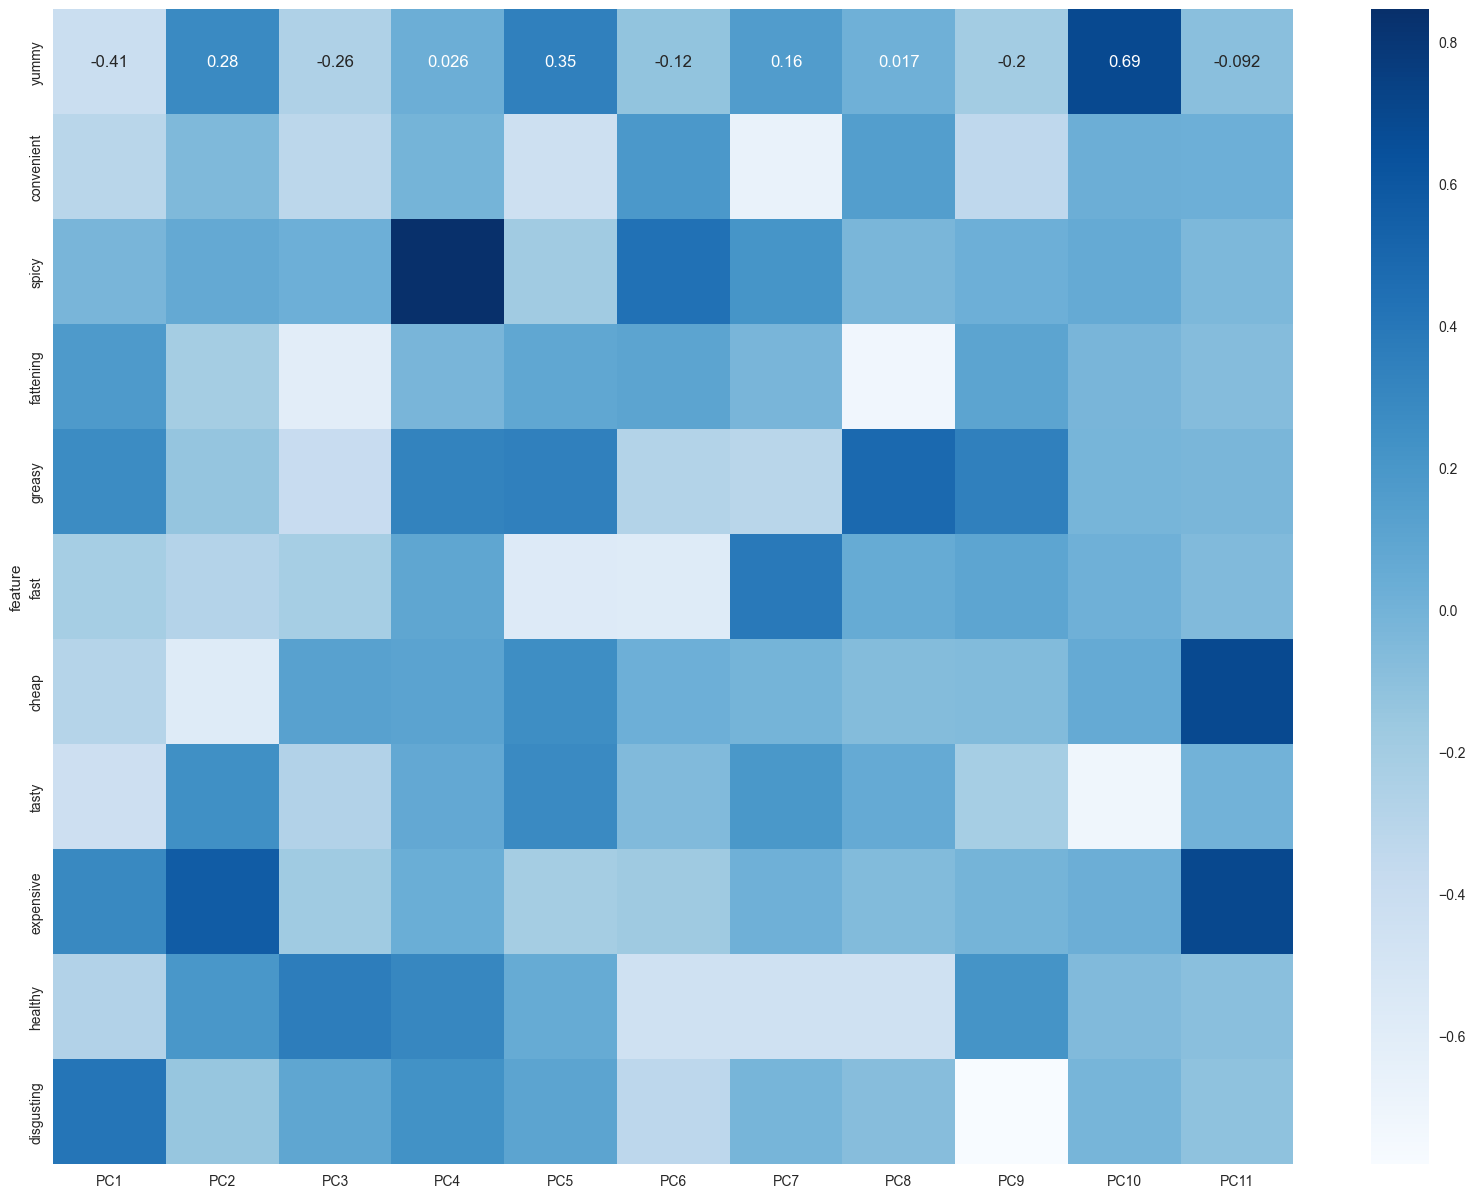

In [14]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Blues')
plt.show()

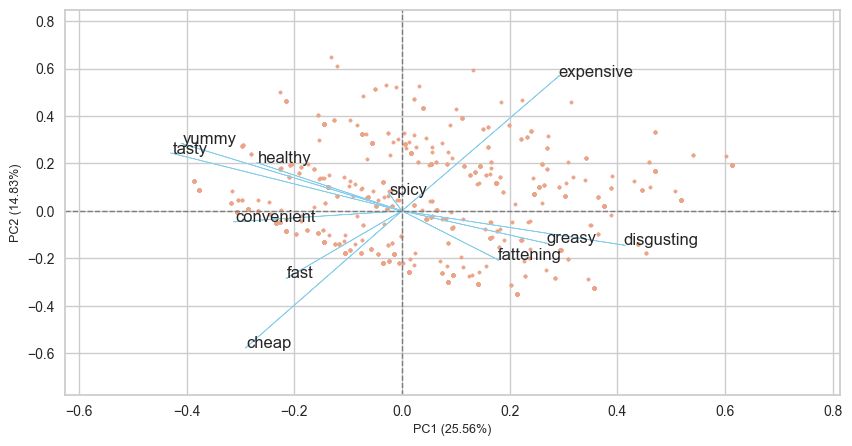

In [15]:
# get PC scores
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

# Applying the Elbow Method

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

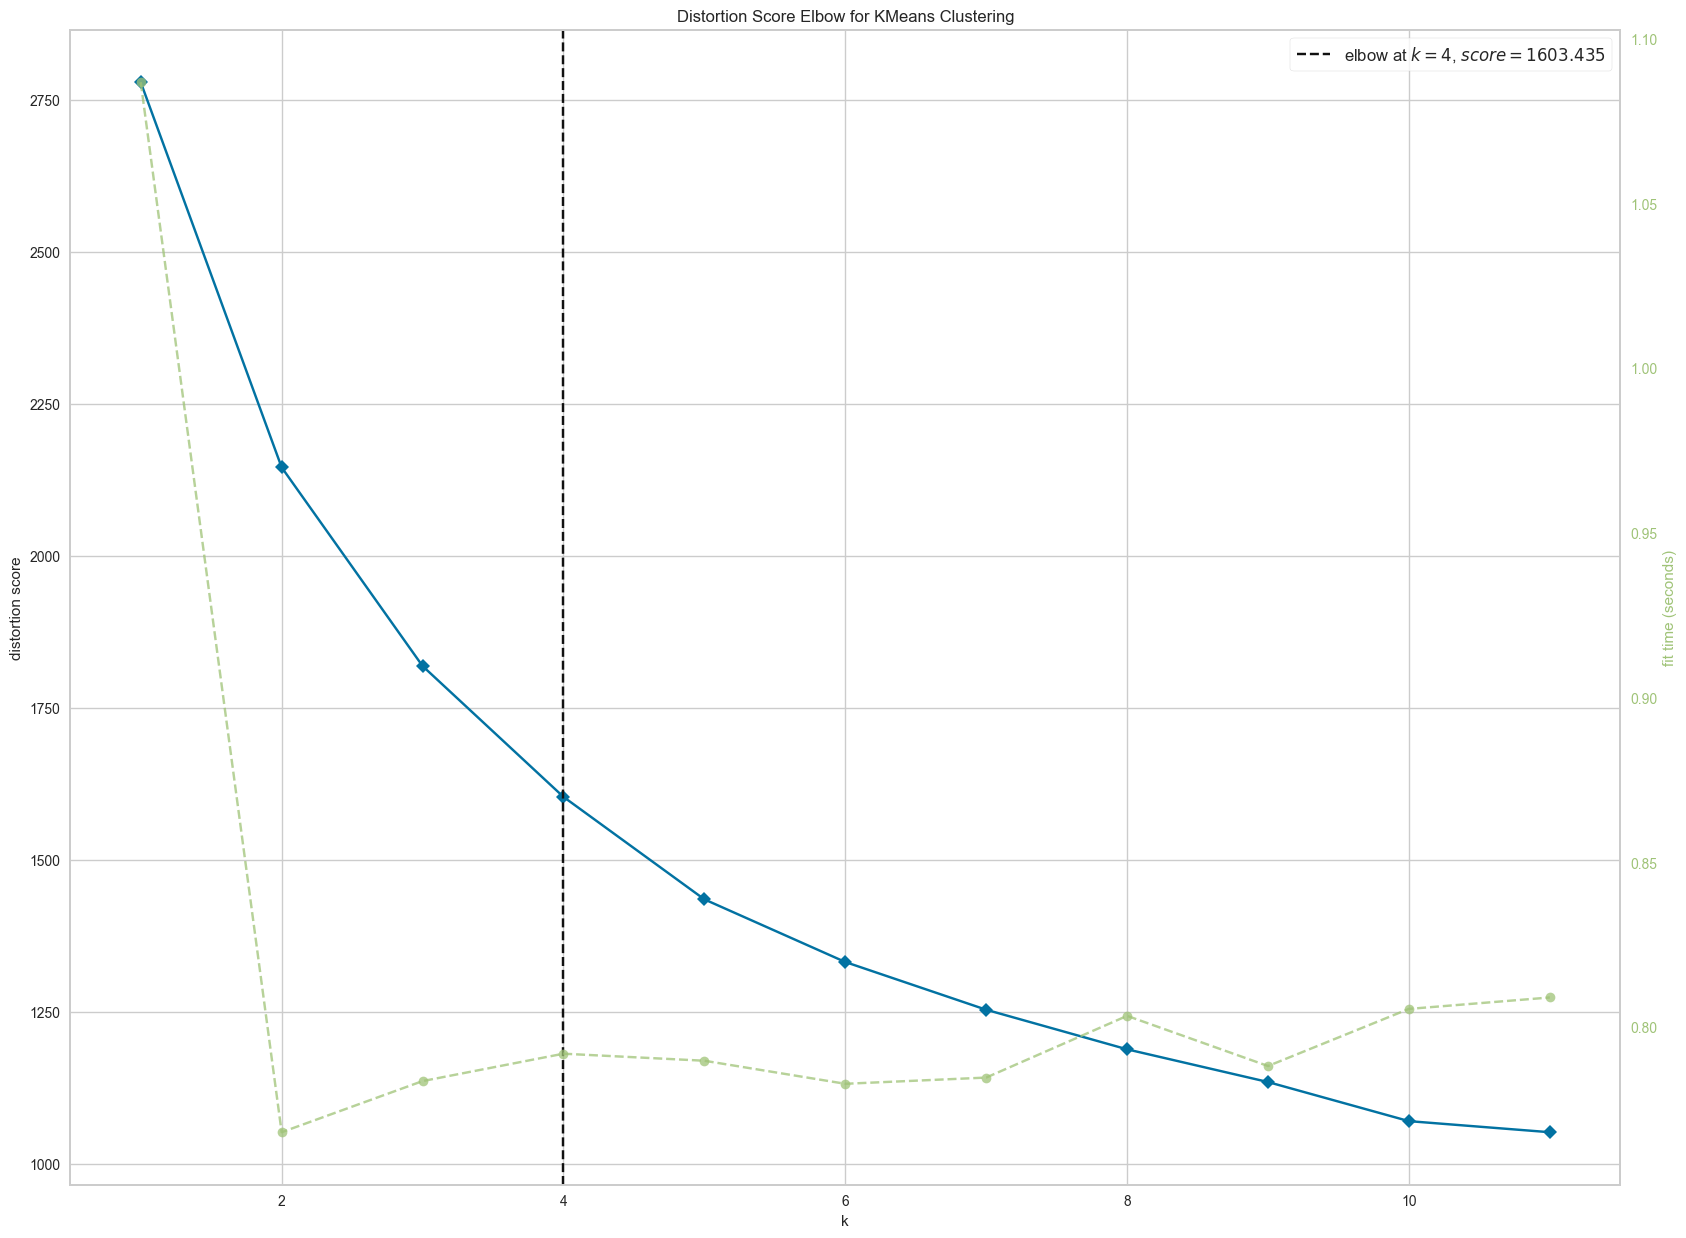

In [16]:
# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

# Applying the Scree Plot

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

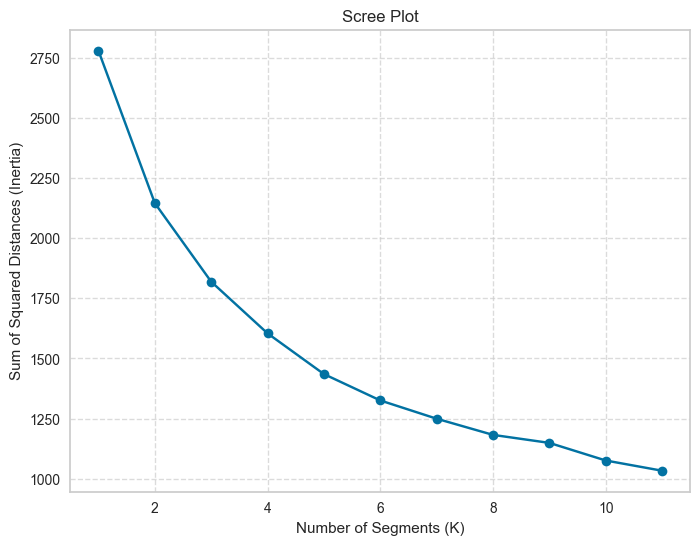

In [17]:
# Ignore specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")

# Assuming you have your data in 'X'
inertias = []  # To store the sum of squared distances

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_encoded)
    inertias.append(kmeans.inertia_)

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), inertias, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Segments (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Scree Plot')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Applying the K-Means Clustering Algorithm

In [18]:
# k-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Labels: [0 2 2 ... 2 1 3]
WCSS: 1602.9303457472085
No. of iterations:  8
Cluster centroids:  [[0.02265372 0.89320388 0.0776699  0.92556634 0.66019417 0.95145631
  0.91909385 0.15533981 0.01294498 0.07119741 0.38511327]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.02083333 0.67916667 0.07916667 0.91666667 0.70833333 0.74583333
  0.06666667 0.08333333 0.89583333 0.0625     0.72916667]]
Cluster size:  Counter({1: 580, 2: 324, 0: 309, 3: 240})


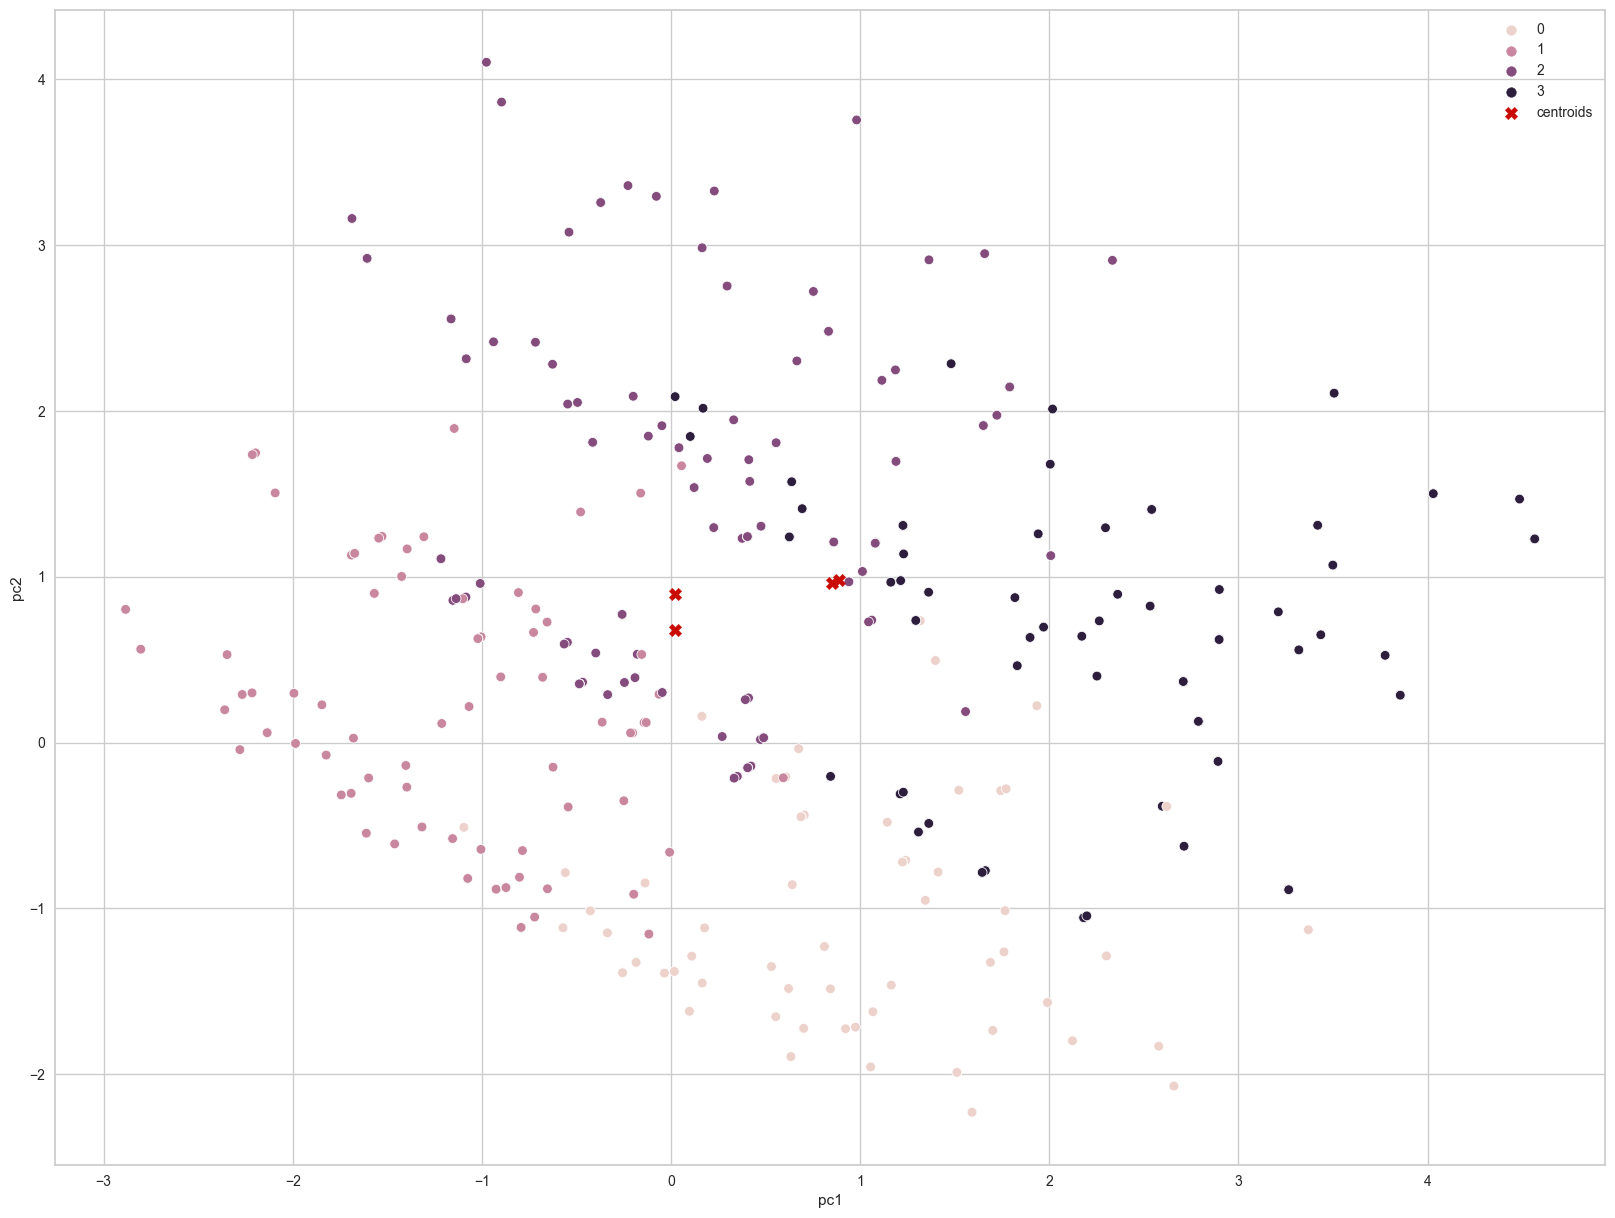

In [19]:
# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## Describing Segments

Index(['+1', '+2', '+3', '+4', '-1', '-2', '-3', '-4', '0', 'I hate it!-5',
       'I love it!+5'],
      dtype='object', name='Like')


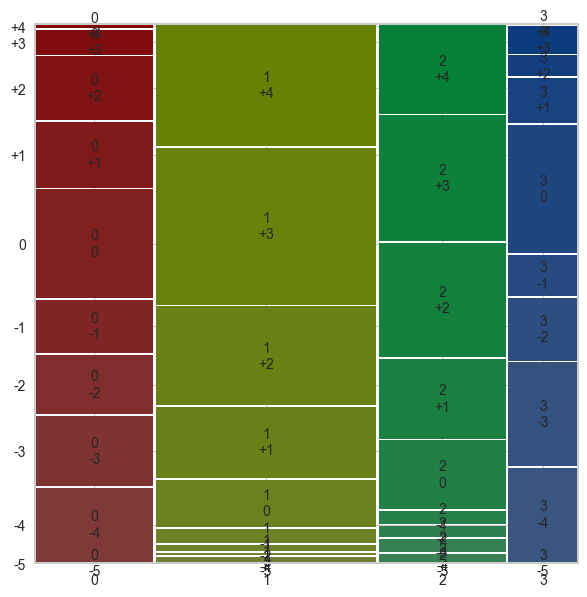

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4
cluster_num,,,,,,,,,,
0,0,36,34,29,26,53,32,31,12,2
1,0,4,2,6,13,43,65,90,143,111
2,0,4,7,6,7,36,42,60,66,47
3,0,27,30,18,12,37,13,6,8,0


None

In [21]:
# Create the crosstab DataFrame
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Check the column names in the crosstab
print(crosstab.columns)

# Ensure that the expected columns exist in the crosstab
expected_columns = ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4']
for col in expected_columns:
    if col not in crosstab.columns:
        crosstab[col] = 0  # Add the missing column and fill with zeros

# Reorder the columns based on the expected order
crosstab = crosstab[expected_columns]

# Plotting mosaic plot
plt.rcParams['figure.figsize'] = (7, 7)
mosaic(crosstab.stack())
display(crosstab, plt.show())


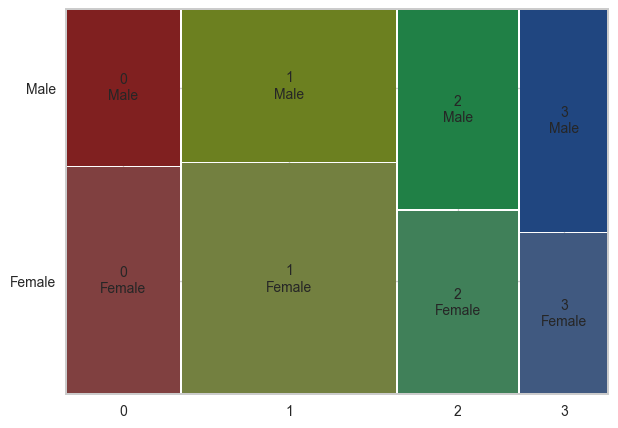

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4
cluster_num,,,,,,,,,,
0,0,36,34,29,26,53,32,31,12,2
1,0,4,2,6,13,43,65,90,143,111
2,0,4,7,6,7,36,42,60,66,47
3,0,27,30,18,12,37,13,6,8,0


None

In [22]:
# crosstab creation
crosstab_gender = pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

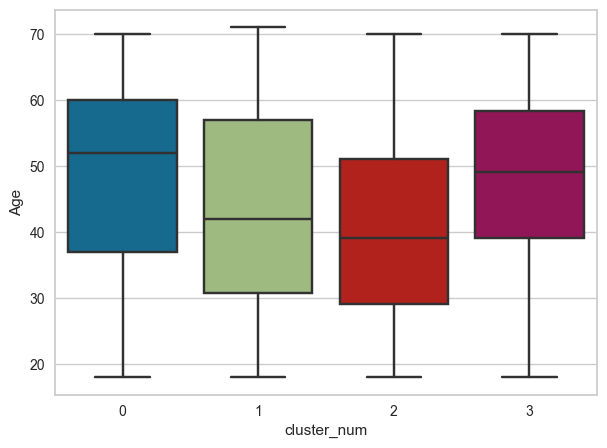

In [23]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=df);

# Selecting the Target Segment

In [24]:
# calculating the mean of 'VisitFrequency'
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [25]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [26]:
# calculating the mean of 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


In [27]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.407767,5.423948,2.809061
1,1,0.398276,3.794828,2.584483
2,2,0.521605,3.808642,2.540123
3,3,0.579167,6.775000,2.679167


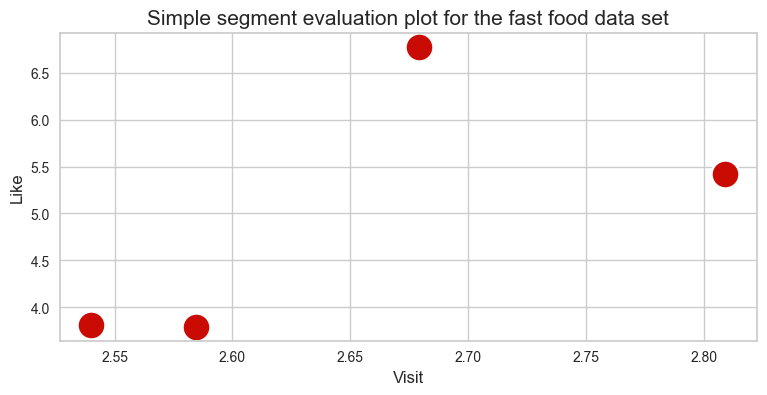

In [28]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()